# <span style="color:blue">Code Review Questions
AWS CLOUD INSTITUTE: PROVIDED FOR EDUCATIONAL INSTRUCTIONAL PURPOSES ONLY.

# Classes and objects

## Simple Class Creation
Create a class to maintain a student's grade across three subjects (physics, chemistry, and biology) and calculate the student's final grade. The final grade will be the average of the individual grades.

You will need to create a Student class with the following:
- Four public properties to record the student's name and grades in the three classes
- Method final_grade to return the student's final grade
- Public attributes, properties, and methods

### Solution

In [ ]:
class Student: 
    def __init__(self, name, phy, chem, bio): 
        self.name = name 
        self.phy = phy 
        self.chem = chem 
        self.bio = bio 

    def final_grade(self): 
        return((self.phy + self.chem + self.bio)  / 3)

#### Test

In [ ]:
student = Student("Ana Carolina Silva", 83, 56, 68)
print("{} final grade: {}".format(student.name, student.final_grade()))

student = Student("John Stiles", 98, 67, 72)
print("{} final grade: {}".format(student.name, student.final_grade()))

## Inheritance
Create classes that represent bank accounts. You are expected to create a base class for a general account and a specialized class to represent a savings account. You will need to create the following:
- A parent Account class to store the account holder's name and balance.
- A child SavingsAccount class to store the interest rate.

### Solution

In [ ]:
class Account: 
    def __init__(self, accountholder=None, balance=0): 
        self.accountholder = accountholder 
        self.balance = balance
        
class SavingsAccount(Account): 
    def __init__(self, accountholder=None, balance=0, interestRate=0): 
        super().__init__(accountholder, balance) 
        self.interestRate = interestRate         

### Test

In [ ]:
bankAcc = Account("Martha Rivera", 1000)
print("{} account balance: {}".format(bankAcc.accountholder, bankAcc.balance))

savingsAcc = SavingsAccount("Sarkar Saani", 2500, 3.5)
print("{} account balance: {}".format(savingsAcc.accountholder, savingsAcc.balance))
print("{} account interest rate: {}%".format(savingsAcc.accountholder, savingsAcc.interestRate))

# Data Structures

## Sorting a Stack
Assume a stack class is implemented using a Python list. How you could enhance the stack by adding a method that re-sorts the values in the stack. 

You will be provided a starting class, MyStack, which implements a stack using a Python list. You are asked to do the following:
- Examine the implementation of MyStack and understand how a list is used to support the standard push and pop stack operations.
- Implement a sort_stack() method in the class. The method will sort the elements in the stack such that if you pop and print all the elements, they will come out in ascending order.

### Solution

In [ ]:
class MyStack:  
    def __init__(self): 
        self.stack_list = [] 
 
    def is_empty(self):  
        return len(self.stack_list) == 0  
 
    def peek(self):  
        if self.is_empty():  
            return None  
        return self.stack_list[-1]  
 
    def size(self):  
        return len(self.stack_list)  
 
    def push(self, value):  
        self.stack_list.append(value)  
 
    def pop(self):  
        if self.is_empty():  
            return None  
        return self.stack_list.pop() 
  
    def sort_stack(self):
        self.stack_list.sort(reverse=True)

#### Test

In [ ]:
# create stack and push items in unsorted order  
stack = MyStack()
stack.push(3)
stack.push(43)
stack.push(9)
stack.push(25)
stack.push(12) 

# Sorting the stack 
stack.sort_stack()
 
# Printing the sorted stack 
print("Stack after sorting") 
print([stack.pop() for i in range(stack.size())])

## Queues - implement a queue using a stack
Implement a queue using only stacks for data storage. This is a challenging problem because queues and stacks operate nearly opposite to each other. In a queue, the first element in will be the first one out (FIFO). In a stack, the last element in will be the first one out (LIFO). This question tests your understanding of both stacks and queues.

You will be provided a MyStack class to use for your solution. You are asked to do the following:
- Implement a MyQueue class that will use the provided Stack class in its implementation.
- Implement the enqueue() and dequeue() standard queue methods.
    - enqueue( ) inserts a value into the queue.
    - dequeue( ) extracts and returns the oldest value in the queue.

### Resources provided

In [ ]:
class MyStack:  
    def __init__(self): 
        self.stack_list = [] 
 
    def is_empty(self):  
        return len(self.stack_list) == 0  
 
    def peek(self):  
        if self.is_empty():  
            return None  
        return self.stack_list[-1]  
 
    def size(self):  
        return len(self.stack_list)  
 
    def push(self, value):  
        self.stack_list.append(value)  
 
    def pop(self):  
        if self.is_empty():  
            return None  
        return self.stack_list.pop() 

### Solution 1
In this solution, most of the work is done in the enqueue method.

In [ ]:
class MyQueue: 
    def __init__(self): 
        self.main_stack = MyStack() 
        self.temp_stack = MyStack() 

    # Inserts Element in the Queue 
    def enqueue(self, value): 
        # if the queue is empty, just push the first value
        if self.main_stack.is_empty(): 
            self.main_stack.push(value)
        # else, the queue is not empty
        else:
            # pop all the elements in the main stack while pushing them into a temporary stack
            while not self.main_stack.is_empty(): 
                self.temp_stack.push(self.main_stack.pop()) 
            # now push the latest item into the main stack
            self.main_stack.push(value)
            # pop all the elements in the temp stack while pushing them back into the main stack
            while not self.temp_stack.is_empty(): 
                self.main_stack.push(self.temp_stack.pop()) 

    # Removes Element From Queue 
    def dequeue(self): 
        # If stack empty then return None 
        if self.main_stack.is_empty(): 
            return None 
        value = self.main_stack.pop() 
        return value

### Test

In [ ]:
queue = MyQueue() 
for i in range(5):
    print("Enqueued {}".format(i+1))
    queue.enqueue(i+1) 
print("----------") 
for i in range(5): 
    print("Dequeued {}".format(queue.dequeue()))

### Solution 2
The following is the second complete solution. The algorithm also uses two stacks, but in this solution, most of the work is done in the dequeue operation.

In [ ]:
class MyQueue:
    
    def __init__(self): 
        self.push_stack = MyStack() 
        self.pop_stack = MyStack() 

    # Inserts Element in the Queue 
    def enqueue(self,value): 
        # Push the value into main_stack
        self.push_stack.push(value) 

    # Removes Element From Queue   
    def dequeue(self):
        # if pop_stack is not empty, pop and return element from pop_stack
        if not self.pop_stack.is_empty(): 
            return self.pop_stack.pop()
        
        # if the push_stack is empty as well, return None
        if self.push_stack.is_empty(): 
            return None
        
        # Transfer all elements from push_stack to pop_stack 
        while not self.push_stack.is_empty(): 
            self.pop_stack.push(self.push_stack.pop()) 

        # Pop the first value. This is the oldest element in the queue 
        return self.pop_stack.pop() 

#### Test

In [ ]:
queue = MyQueue() 
for i in range(5):
    print("Enqueued {}".format(i+1))
    queue.enqueue(i+1) 
print("----------") 
for i in range(5): 
    print("Dequeued {}".format(queue.dequeue()))

## Linked lists - implement length() function
Implement the length() function, which will find the length of a given linked list. You will be provided with a standard LinkedList class to use in your implementation.

### Resources provided

In [ ]:
class Node: 
    def __init__(self, data): 
        self.data = data 
        self.next_element = None

In [ ]:
class LinkedList: 
    def __init__(self): 
        self.head_node = None 

    def get_head(self): 
        return self.head_node 

    def is_empty(self): 
        if(self.head_node is None):  # Check whether the head is None 
            return True 
        else: 
            return False 

    def insert_at_head(self, dt): 
        temp_node = Node(dt) 
        if(self.is_empty()): 
            self.head_node = temp_node 
            return self.head_node 

        temp_node.next_element = self.head_node 
        self.head_node = temp_node 
        return self.head_node 

    # Inserts a value at the end of the list 
    def insert_at_tail(self, value): 
        # Creating a new node 
        new_node = Node(value) 

        # Check if the list is empty, if it is simply point head to new node 
        if self.get_head() is None: 
            self.head_node = new_node 
            return

        # if list not empty, traverse the list to the last node 
        temp = self.get_head() 
        while temp.next_element is not None: 
            temp = temp.next_element 

        # Set the nextElement of the previous node to new node 
        temp.next_element = new_node 
        return

    def delete_at_head(self): 
        # Get Head and firstElement of List 
        first_element = self.get_head() 
        # If List is not empty then link head to the 
        # nextElement of firstElement. 
        if (first_element is not None): 
            self.head_node = first_element.next_element 
            first_element.next_element = None 
        return 

    def delete(self, value): 
        deleted = False 
        if self.is_empty():  # Check if list is empty -> Return False 
            print("List is Empty") 
            return deleted 
        current_node = self.get_head()  # Get current node 
        previous_node = None  # Get previous node 
        if current_node.data is value: 
            self.delete_at_head()  # Use the previous function 
            deleted = True 
            return deleted 

        # Traversing/Searching for Node to Delete 
        while current_node is not None: 
            # Node to delete is found 
            if value is current_node.data: 
                # previous node now points to next node 
                previous_node.next_element = current_node.next_element 
                current_node.next_element = None 
                deleted = True 
                break 
            previous_node = current_node 
            current_node = current_node.next_element 

        return deleted 
  
    def search(self, dt): 
        if self.is_empty(): 
            print("List is Empty") 
            return None 
        temp = self.head_node 
        while(temp is not None): 
            if(temp.data is dt): 
                return temp 
            temp = temp.next_element 

        print(dt, " is not in List!") 
        return None 

### Solution

In [ ]:
def length(lst): 
    # start from the first element 
    curr = lst.get_head() 
    length = 0 

    # Traverse the list and count the number of nodes 
    while curr: 
        length += 1 
        curr = curr.next_element 
    return length

#### Test

In [ ]:
lst = LinkedList() 
lst.insert_at_head(4) 
lst.insert_at_head(3) 
lst.insert_at_head(2) 
lst.insert_at_head(1) 
lst.insert_at_head(0) 
print("List length is ", length(lst)) 

## Min and max heaps - convert a max heap to a min heap
Create a max_to_min() function, which will convert a max heap to a min heap. A heap is a binary tree that satisfies the heap property. The property specifies that for every node in a tree, the value is greater than or equal to (in a max heap) or less than or equal to (in a min heap) its children. 

This problem also requires that you remember how to represent a heap using an array, which in Python is represented as a list. This follows a pattern where heap[k] <= heap[2*k+1] and heap[k] <= heap[2*k+2] for all k, counting elements from zero. The formula might not be intuitive, so look at the following image, which is an example of that list representation and the max_to_min() expected behavior.

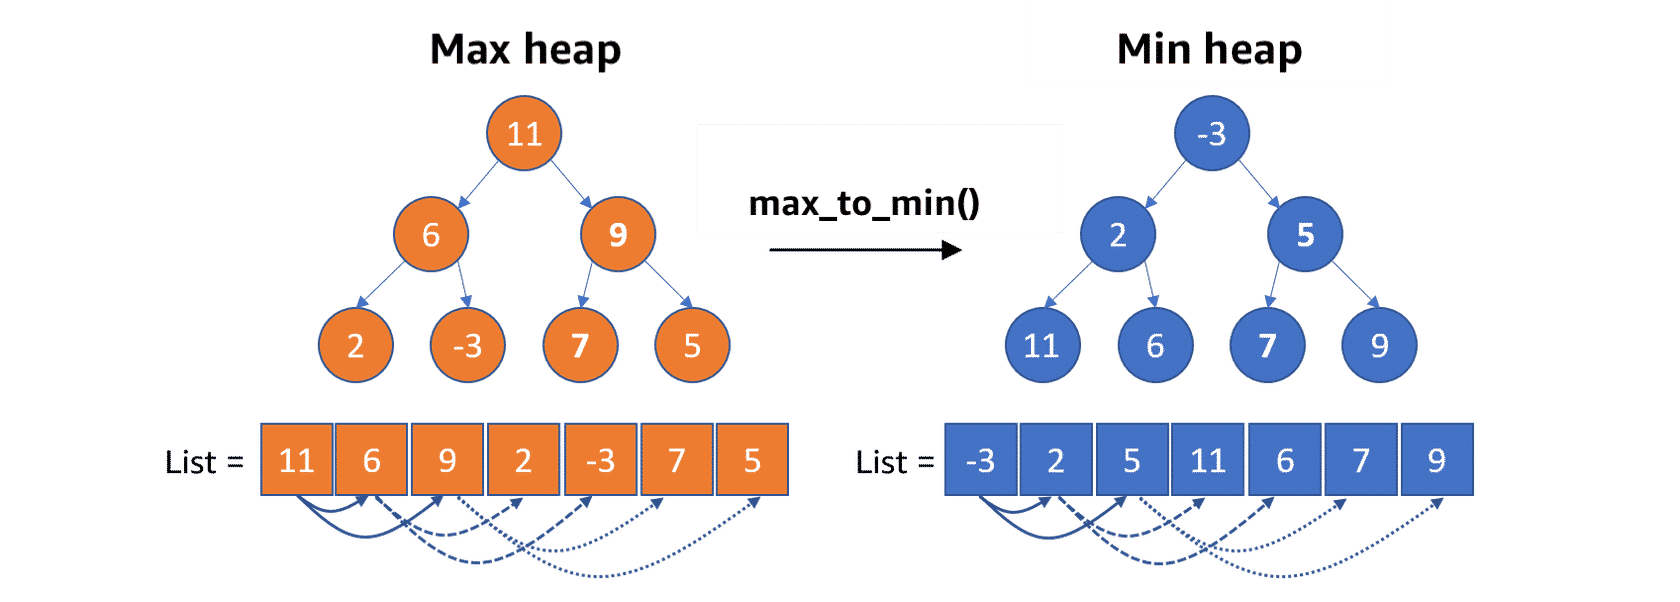

### Solution
The following is one possible solution to this case. The solution combines two functions, one that walks through the max heap bottom up, and another that progressively builds the min heap using recursion. 

In [ ]:
def min_heapify(heap, index):
    # initialize variables to point to left and right nodes
    left = index * 2 + 1 
    right = index * 2 + 2
    
    # initialize smallest to the current node
    smallest = index
    
    # check if left child exists and is less than smallest 
    if len(heap) > left and heap[smallest] > heap[left]: 
        smallest = left
        
    # check if right child exists and is less than smallest 
    if len(heap) > right and heap[smallest] > heap[right]: 
        smallest = right
        
    # check if current index is not the smallest 
    if smallest != index: 
        # swap current index value with smallest 
        tmp = heap[smallest] 
        heap[smallest] = heap[index] 
        heap[index] = tmp 
        # min_heapify the new node 
        min_heapify(heap, smallest)
        
    return heap 

def max_to_min(max_heap): 
    # iterate from middle to first element 
    # middle to first indices contain all parent nodes 
    for i in range(len(max_heap)//2, -1, -1): 
        # call min_heapify on all parent nodes 
        min_heap = min_heapify(max_heap, i)
        
    return min_heap

#### Test

In [ ]:
max_heap = [11, 6, 9, 2, -3, 7, 5] 
print(max_to_min(max_heap))

### Solution with print statements
Sometimes, it is also helpful to visualize the progression of recursion by adding multiple print statements inside the code. It's also useful to indent the recursive items and nested loops. How many print statements? As many as you need to help understand the progress.

In [ ]:
def min_heapify_wp(heap, index, rlevel): 
    # initialize variables to point to left and right nodes
    left = index * 2 + 1 
    right = (index * 2) + 2
    print("".rjust(rlevel*4) + "min_heapify_wp called with Index={} with value {} - Left child index={} - Right child index={}".format(index,heap[index],left, right))
    
    # initialize smallest to the current node
    smallest = index
    print("".rjust(rlevel*4) + f"Initialize value at index ({heap[smallest]}) as the smallest")

    # check if left child exists and is less than smallest 
    if len(heap) > left and heap[smallest] > heap[left]:
        print("".rjust(rlevel*4) + f"Left child value ({heap[left]}) is smaller than current smallest ({heap[smallest]}), so make it the new smallest")
        smallest = left

        
    # check if right child exists and is less than smallest 
    if len(heap) > right and heap[smallest] > heap[right]:
        print("".rjust(rlevel*4) + f"Right child value ({heap[right]})  is smaller than current smallest ({heap[smallest]}), so make it the new smallest")
        smallest = right
        
    # check if current index is not the smallest 
    if smallest != index:
        print("".rjust(rlevel*4) + f"Value at index({heap[index]}) was not the smallest, so swap it with smallest({heap[smallest]})")
        
        # swap current index value with smallest 
        tmp = heap[smallest] 
        heap[smallest] = heap[index] 
        heap[index] = tmp
        
        # min_heapify_wp the new node 
        print("".rjust(rlevel*4) + "Recursevely calling min_heapify_wp with index {} (value = {}) and heap {}".format(smallest, heap[smallest], heap))
        min_heapify_wp(heap, smallest, rlevel + 1)
    else:
        print("".rjust(rlevel*4) + f"Value at index[{index}] ({heap[index]}) is already the smallest, so nothing to do")

        
    print("".rjust(rlevel*4) + "min_heapify_wp returned for index {}: heap {}".format(index, heap))
    return heap 

def max_to_min_wp(max_heap): 
    # iterate from middle to first element 
    # middle to first indices contain all parent nodes 
    for i in range((len(max_heap))//2, -1, -1): 
        # call min_heapify on all parent nodes
        print("\nCalling min_heapify with index {} (value = {}) and heap {}".format(i, max_heap[i], max_heap))
        min_heap = min_heapify_wp(max_heap, i, 1) 
    return min_heap

#### Test

In [ ]:
max_heap = [11, 6, 9, 2, -3, 7, 5] 
print(max_to_min_wp(max_heap))

## Binary Tree - calculate the size
Calculate the size of a tree. The size of the tree is the total number of nodes in a tree. For example, in the following tree, the tree size would be 6. You are required to write a tree_size() function that will return the size of a binary tree given the root node of the tree. 

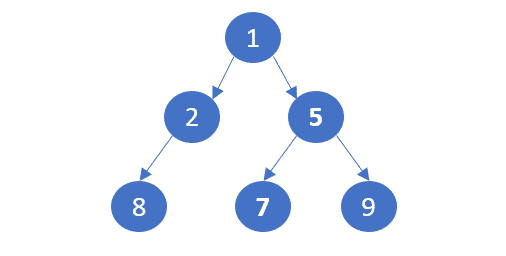

### Resources provided
You are provided with the Node class to be used in your solution. It's a basic tree node with the standard variables for data, left, and right. You can use Node without any modifications.

In [ ]:
class Node:
    def __init__(self, data):
        self.data = data
        self.left = None
        self.right = None

### Solution

In [ ]:
def tree_size(root):
    # Base case: size of an empty sub-tree is 0
    if root is None:
        return 0
    else:
        # size of the tree is 1 for the current node, plus the size on the left and right 
        return (1 + tree_size(root.left) + tree_size(root.right))

#### Test

In [ ]:
# Build a tree
root = Node(1)
root.left = Node(2)
root.right = Node(5)
root.left.left = Node(8)
root.right.left = Node(7)
root.right.right = Node(9)

# print tree size
print("Tree size is ", tree_size(root))

## Trie - total number of words
Find the total number of words in a trie. You are provided with a fully implemented Trie class, and you will write a total_words() function to calculate the total number of words.

### Resources provided
You are provided with the TrieNode and Trie classes to be used in your solution. Trie has the standard methods to insert, retrieve, and search for words in a trie. The words are stored in TreeNode objects. 

Every TrieNode object will have a character on the word, a list of all potential next characters, and an is_end_word variable to indicate whether the node is the final character in a word. You can use them as they are without any modifications.

In [ ]:
class TrieNode:
    def __init__(self, char=''):
        # declare children for 26 possible letters in the alphabet
        self.children = [None] * 26
        
        # true if the node is the end of a word
        self.is_end_word = False
        
        # the charcter in this node
        self.char = char

In [ ]:
class Trie:
    def __init__(self):
        self.root = TrieNode()

    # get the index of character 't'
    def get_index(self, t):
        return ord(t) - ord('a')

    # insert a key in the Trie
    def insert(self, key):
        if key is None:
            return False

        # normalize keys to lowercase
        key = key.lower()  

        # iterate over each letter in the key
        current = self.root
        for letter in key:
            index = self.get_index(letter)
            
            # if the letter node doesn't exist create a TrieNode for it
            if current.children[index] is None:
                current.children[index] = TrieNode(letter)

            # go down a level to the next character
            current = current.children[index]

        # mark the end of the word
        current.is_end_word = True

    # search a given key in Trie
    def search(self, key):
        if key is None:
            return False

        # normalize keys to lowercase
        key = key.lower()
     
        # iterate over each letter in the key
        current = self.root
        for letter in key:
            index = self.get_index(letter)
            
            # if the letter node doesn't exist then this word is not in the Trie
            if current.children[index] is None:
                return False
            
            # go down a level to the next character
            current = current.children[index]

        # if we finished traversal at the end of a word, than key was found
        if current is not None and current.is_end_word:
            return True

        return False

### Solution
You will see it is similar to the binary tree solution because it uses recursion to propagate the call from the root down to the children. As always, with recursive code, it helps if you pick an example, and walk through how the code would work step by step.

In [ ]:
def total_words(root): 
    result = 0 

    # if this is the end of a word, add to total
    if root.is_end_word: 
        result += 1 

    # check for all possible continuations of a word
    for letter in root.children: 
        if letter is not None:
            # recursively look for and add all possible continuations of a word
            result += total_words(letter)
            
    return result

#### Test

In [ ]:
keys = ["the", "all", "them", "boat", "also", "allow", "cat", "allowance"] 

# create a Trie with the 5 keys 8 keys above
trie = Trie() 

# load the trie with the sample keys
for key in keys: 
    trie.insert(key) 

# use function to calculate the total number of words 
print("Total words in the trie: ", total_words(trie.root)) 

# Algorithms

## Recursion - Multiplication without * operator
Imagine you are being asked to find the product of two positive integers without using the standard Python multiplication operator (*). You will write a recursive_multiply() function to perform the operation.

### Solution
Remember that multiplying x and y can also be represented as adding x, y times. For example:

5 * 4 = 20

can also be calculated as:

5 + 5 + 5 + 5 = 20

In [ ]:
def recursive_multiply(multiplier, multiplicand):
    # base case to stop recursion
    if multiplicand == 0:
        return 0

    # it's more efficient to have a smaller multiplicand because it reduces 
    # the number of recursions
    # so swap multiplier and multiplicand if needed
    if multiplier < multiplicand:
        multiplier, multiplicand = multiplicand, multiplier

    # recursively call the function, while decrementing the multiplicand
    return multiplier + recursive_multiply(multiplier, multiplicand - 1)

#### Test

In [ ]:
x = 11
y = 21

print("Multiplication using Python * operator: ", x * y)
print("Multiplication using recursion: ", recursive_multiply(x, y))

## Searching - Find position of item
Write a find_position() function, which will find the position of a value within a sorted list. If the value is not present, return the index at which the value should be inserted. You can assume that no duplicates are in the list. You are also asked to perform this task in the most efficient way possible.

### Solution
The fact that the question is asking for "most efficient way possible" should be a clear indication that we don't want simple linear search. So the solutions is a binary search.

In [ ]:
def find_position(lst, value):
    # set initial search indexes, and current search position
    start = 0 
    end = len(lst) - 1
    pos = 0 

    # perform a binary search, reducing the search space in half each time
    while start <= end:
        # calculate mid point of current search area
        mid = start + (end - start) // 2 

        # if value at mid point is what we want, return mid
        if lst[mid] == value: 
            return mid
        
        # if current value is greater than search value, then adjust to search to lower half
        elif lst[mid] > value: 
            end = mid - 1 
            pos = mid
            
        # if current value is smaller than search value, then adjust to search to higher half
        else: 
            start = mid + 1 
            pos = mid + 1
            
    # return the last position we searched, which will be the place to insert
    return pos 

#### Test

In [ ]:
lst = [1, 2, 3, 5, 8, 13, 21, 25] 
print("List is ", lst)
print("Index location for 3: ", find_position(lst, 3))
print("Index location for 9: ", find_position(lst, 9))
print("Index location for 21: ", find_position(lst, 21))

## Searching - Find two numbers that add up to a value
In this question, you are given a list with unique numbers and are asked to write a find_sum() function, which will find two numbers in that list that add up to a target value. For example, if you are given a list with [3, 2, 5, 6] and a target value of 8, your function could either return [3 , 5] or [2 , 6]. Either answer is valid, and the one that is selected might depend on the order your algorithm looks at the list.

There is different solutions for this, some more effecient than others. Let's look at them.

### Less efficient solution - brute force nested loop
This is the simplest, and less efficent option. It uses a double for loop to check every possible combination of two values adding. 

In [ ]:
def find_sum(input_list, target): 
    # iterate through list and check every value
    for i in range(0, len(input_list) - 1):
        for j in range(i + 1, len(input_list)):
            if (input_list[i] + input_list[j] == target):
                return [input_list[i],input_list[j]]

#### Test

In [ ]:
lst = [3, 2, 7, 1, 4, 6]
target = 5
print(f"Numbers that add to {target}: {find_sum(lst, target)}")
target = 7
print(f"Numbers that add to {target}: {find_sum(lst, target)}")

#### Complexity analysis
This is a typical nested-loop scenario.
- **Time complexity: <span style="color:blue">O(n<sup>2</sup>)**</span>

### More efficient solution - binary search
This solution will combine elements of sorting and binary search. The primary find_sum() function will call a binary_search() helper function. binary_search() is a standard implementation of the binary search algorithm.

In [ ]:
def binary_search(input_list, item):
    '''
    Standard binary search algorithm
    '''
    first = 0 
    last = len(input_list) - 1 
    found = False 

    while first <= last and not found: 
        mid = (first + last) // 2 

        if input_list[mid] == item: 
            found = mid 
        else: 
            if item < input_list[mid]: 
                last = mid - 1 
            else: 
                first = mid + 1 

    return found

In [ ]:
def find_sum(input_list, target): 
    # sort input list
    input_list.sort() 

    # iterate through list
    for i in input_list:
        # calculate number that added to this one, would give us the target
        complement = target - i
        # check if the complement number is in the list
        index = binary_search(input_list, complement) 
        if index: 
            return [i, complement]

#### Test

In [ ]:
lst = [3, 2, 7, 1, 4, 6]
target = 5
print(f"Numbers that add to {target}: {find_sum(lst, target)}")
target = 7
print(f"Numbers that add to {target}: {find_sum(lst, target)}")

#### Complexity analysis
This function requires a couple key steps:
- In the first step you sorted the list, and sorting takes time. We can assume the Python sort uses an efficient sorting algorithm, so it's fair to expect the complexity for this step to be no worse than O(n log n).
- Then in the second step you itereate *n* times. Inside the loop, you perform a binary search which is O(log n). There fore the whole loop becomes O(n log n)

So when you add the two together you get:
- **Time complexity: <span style="color:blue">O(n log n + n log n)**</span>

## Searching - Searching a cyclic array
Write an efficient find_smallest() function that determines the index of the smallest element of the cyclically shifted array. In Python, use the list class to represent arrays.

A cyclically shifted array is an array that can become sorted if you rotate the elements. For example, the array [4, 5, 6, 7, 1, 2, 3] is cyclic because if you rotate the elements, it eventually becomes [1, 2, 3, 4, 5, 6, 7].

Once again, there is a simple brute-force nested loop solution to this, but the question is looking for a more efficient algorithm.

### Solution
If you examine the code, you can see it's almost identical to the binary search you've seen before. 

In [ ]:
def find_smallest(arr): 
    low = 0 
    high = len(arr) - 1 

    while low < high:
        # find mid point
        mid = (low + high) // 2 

        # if mid is greater than last element, then the low value is in the top half
        if arr[mid] > arr[high]: 
            low = mid + 1
        # else if mid is smaller or equal than last element, the low value is in the lower half
        elif arr[mid] <= arr[high]: 
            high = mid 

    return low

#### Test

In [ ]:
arr = [7, 6, 1, 2, 3, 4, 5] 

idx = find_smallest(arr)
print(f"Smallest element {arr[idx]}, found at index {idx}")

# Dynamic Programming

## Momoization - The knapsack problem
The knapsack problem is a well-known coding problem and a good example of how you might use the different types of algorithms, including recursion and dynamic programming. Imagine that you’re a jewelry maker in video game, and you are preparing to sell items at the local virtual marketplace. You only have a knapsack capable of carrying a limited amount of your wares by weight. Your goal is to choose a combination of items that will result in the most profit.

You will need to write a function called knapsack(profits, weights, max_weight) with the following parameters:
- profits – A list of the profit for each item
- weights – A list with the weight of each item
- max_weight – The maximum weight that the knapsack can hold

The function will return the maximum profit you can make by packing the right items in the knapsack.

### Solution - plain recursion
There are two functions in this solution. Most of the work is in the knapsack_recursive() function. The main knapsack() is just an entry point. 

In [ ]:
def knapsack_recursive(profits, weights, capacity, current_index): 
    # base exit cases for recursion
    if capacity <= 0 or current_index >= len(profits): 
        return 0 

    this_weight = weights[current_index]
    profit_with = 0
    
    # if the current item fits, recursively calculate solution with it
    if this_weight <= capacity: 
        profit_with = profits[current_index] + knapsack_recursive(
            profits, weights, capacity - this_weight, current_index + 1) 

    # recursively calculate solution without including this item
    profit_without = knapsack_recursive(
        profits, weights, capacity, current_index + 1) 
  
    return max(profit_with, profit_without) 

def knapsack(profits, weights, max_weight): 
    profit = knapsack_recursive(profits, weights, max_weight, 0) 
    return profit

#### Test

In [ ]:
items = ["ring", "pendant", "watch", "knecklace", "bracelet", "earrings"]
profits = [2, 6, 10, 14, 12, 8]  
weights = [1, 2, 6, 5, 4, 3]

max_weight = 17
max_profit = knapsack(profits, weights, max_weight)
print(f"Profit with a max weight of {max_weight} = {max_profit}")

max_weight = 12
max_profit = knapsack(profits, weights, max_weight)
print(f"Profit with a max weight of {max_weight} = {max_profit}")

### Solution - memoization

In [ ]:
def knapsack_recursive_mem(item_capacity, profits, weights, capacity, current_index): 
    # base exit cases for recursion
    if capacity <= 0 or current_index >= len(profits): 
        return 0 

    # if we have had previously checked this combination, return result from the table 
    if item_capacity[current_index][capacity] != -1:
        print("Memoization is great!")
        return item_capacity[current_index][capacity]
    
    this_weight = weights[current_index]
    profit_with = 0
    
    # if the current item fits, recursively calculate solution with it
    if this_weight <= capacity: 
        profit_with = profits[current_index] + knapsack_recursive_mem(
            item_capacity, 
            profits, weights, capacity - this_weight, current_index + 1) 

    # recursively calculate solution without including this item
    profit_without = knapsack_recursive_mem(
        item_capacity, 
        profits, weights, capacity, current_index + 1) 
  
    # update our table of answers, with the maximum profit, and return it
    item_capacity[current_index][capacity] = max(profit_with, profit_without) 
    return item_capacity[current_index][capacity]

def knapsack_mem(profits, weights, max_weight): 
    # initialize lookup table for every combination of item and possible weight
    item_capacity = [[-1 for x in range(max_weight + 1)] for x in range(len(profits))] 

    max_profit = knapsack_recursive_mem(item_capacity, profits, weights, max_weight, 0) 
    return max_profit

#### Test

In [ ]:
items = ["ring", "pendant", "watch", "knecklace", "bracelet", "earrings"]
profits = [2, 6, 10, 14, 12, 8]  
weights = [1, 2, 6, 5, 4, 3]

max_weight = 17
max_profit = knapsack_mem(profits, weights, max_weight)
print(f"Profit with a max weight of {max_weight} = {max_profit}")

max_weight = 12
max_profit = knapsack_mem(profits, weights, max_weight)
print(f"Profit with a max weight of {max_weight} = {max_profit}")

# Additional Coding Questions
This section has a collection of questions that could have fit into some of the earlier topics. I considered shifting them there, but this is the way they are presented in the eLearning, so I decided if anyone wanted to follow the eLearning along with the notebook, maintaining the same order was a better option.

## Dictionary Comprehension
Dictionary comprehension is a succinct way to create or transform dictionaries in Python. Following are a few how-to questions on it.

### Using dictionary comprehension to create a dictionary from two lists
Given a list with keys (item names) and another list with prices, use dictionary comprehension to combine the lists and create a *item_prices_dict* dictionary like this:

```
item_prices_dict = {'Laptop': 1199.99,
                    'Mouse': 29.99,
                    'Keyboard': 39.99,
                    'Monitor': 179.99}
```

#### Resources provided
You can use the following input list of keys and values for the solution.

In [ ]:
item_keys = ['Laptop', 'Mouse', 'Keyboard', 'Monitor']
item_prices = [1199.99, 29.99, 39.99, 179.99]

#### Solution

In [ ]:
# Dictionary comprehension creating a dictionary from two lists
item_prices_dict = {item: price for (item, price) in zip(item_keys, item_prices)}

print("Dictionary: ", item_prices_dict)

### Using dictionary comprehension to transform a dictionary
Given the same *item_keys* and *item_prices* prived earlier, use dictionary comprehension to create a new *discount_items* dictionary where all the prices are discounted by 20%

#### Solution

In [ ]:
# Giving a 20% discount 
discount = 0.8

# Dictionary comprehension creating a dictionary by transformating another one
discount_items = {item: round(price * discount, 2)
                  for (item, price) in zip(item_keys, item_prices)}

print("Dictionary: ", discount_items)

### Using dictionary comprehension to filter a dictionary
What if you want to filter the list to only inexpensive items, namely those under $100. Use dictionary comprehension to filter the lists as you create the dictionary.

#### Solution

In [ ]:
item_keys = ['Laptop', 'Mouse', 'Keyboard', 'Monitor'] 
item_prices = [1199.99, 29.99, 39.99, 179.99] 

# Dictionary comprehension creating a dictionary by transforming another one
cheap_items = {item: price for 
               (item, price) in zip(item_keys, item_prices) if price < 100}

print("Cheap items: ", cheap_items)

## Sorting dictionaries
There are a number of different ways you can sort a dictionary, depending on whether you are sorting keys, values or both. Let's look at some of those.

#### Resources provided
For the questions below, use the following dictionary.

In [ ]:
item_prices_dict  = {'Laptop': 1199.99, 
                     'Mouse': 29.99, 
                     'Keyboard': 39.99,
                     'webcam': 99.99,
                     'Monitor': 179.99}

### Sorting dictionary keys
How would you sort just the dictionary keys?

#### Solution
The sorted function will sort the keys by default.

In [ ]:
# Sort dictionary by keys using the sorted function
sorted_dict = sorted(item_prices_dict)
print("Result: {}".format(sorted_dict))

### Sorting keys and values based on a custom value
Sort the dictionary based on price. The result should be a list of (item, price) tuples, in ascending order of price.

#### Solution

In [ ]:
item_prices_dict = {'Laptop': 1199.99, 
                  'Mouse': 29.99, 
                  'Keyboard': 39.99,
                  'webcam': 99.99,
                  'Monitor': 179.99}

# get dictionary items
dict_items = item_prices_dict.items()
print("Dictionary items: {}".format(dict_items))

# sort dictionary items
sorted_items = sorted(dict_items, key=lambda x:x[1])
print("Sorted items: {}".format(sorted_items)) 

### Creating a dictionary from a list of items
The solution above gave us a list of tuples, but not a dictionary. If we wanted to end up back with a dictionary, we need to create a dictionary from a list of tuples. How do we do that?

In [ ]:
# sort dictionary items
print("Sorted tuples: {}".format(sorted_items))

# created a dictionary from sorted items
sorted_dict = dict(sorted_items)
print("Sorted dictionary: {}".format(sorted_dict)) 

## Bubble sort optimization
Show how you might be able to optimize the bubble sort algorith. Start by showing the basic approach, and then show examples of possible improvements.

### Solution

#### Option 1 - The most basic double loop
This is the non-optimized version. We can use it as our starting point for improvements.

In [ ]:
def bubble_sort(input_list):
    # set list length
    list_length = len(input_list)
    
    # Iterate through all elements of the list
    for i in range(list_length):
        # loop and compare against the next element
        for j in range(0, list_length - 1):
            if input_list[j] > input_list[j+1]: 
                input_list[j], input_list[j+1] = input_list[j+1], input_list[j] 

    return input_list

##### Test

In [ ]:
# Example of usage 
input_list = [7, 2, 9, 1, 6, 3, 8, 4, 5] 
print(f"Original list: {input_list}") 

# Sort the list using bubble sort 
sorted_list = bubble_sort(input_list) 
print(f"Sorted list: {sorted_list}") 

#### Option 2 - improved algorithm with reduced loop
This is an improved algorithm, which will reduce the executions of your inner loop. If you look at your previous algorithm, with the comparison if input_list [j] > input_list [j+1]:, you are always moving a higher element further down the list if it's greater than the next. So after the first iteration, you can assume that the highest element will be at the very end. After the second iteration, the second highest will be next to last, and so on. If you can't visualize that, try working through a small example.

With that in mind, in this next algorithm, you change the inner loop so that it will progressively reduce how far you are looking down the list. Look closely, because there is only one small change, where you add an extra  -i  in the for j ... loop.

In [ ]:
def bubble_sort(input_list):
    # set list length
    list_length = len(input_list)
    
    # Iterate through all elements of the list
    for i in range(list_length):
        # loop and compare against the next element
        # Earlier iterations should have moved larger items to
        # the end, so reduce loop to skip those
        for j in range(list_length -i - 1):
            if input_list[j] > input_list[j+1]: 
                input_list[j], input_list[j+1] = input_list[j+1], input_list[j] 

    return input_list

##### Test

In [ ]:
# Example of usage 
input_list = [7, 2, 9, 1, 6, 3, 8, 4, 5] 
print(f"Original list: {input_list}") 

# Sort the list using bubble sort 
sorted_list = bubble_sort(input_list) 
print(f"Sorted list: {sorted_list}") 

#### Option 3 - stopping when sorting is done
There is still one more thing you can do to optimize the algorithm. Unless the input list is the exact reverse of the sorted order, your algorithm will not need all the iterations to complete the sort. If you use a simple Boolean variable, you can check if you are done with the sort earlier and then stop and exit the loop in that case. All you need to do is check if any elements had to be swapped during one iteration. If none did, then your sort must be done.

In [ ]:
def bubble_sort(input_list):
    # set list length
    list_length = len(input_list)
    
    # Iterate through all elements of the list
    for i in range(list_length):
        # inialize variable to detect swap
        swapped = False
        
        # loop and compare against the next element
        for j in range(0, list_length -i - 1):
            if input_list[j] > input_list[j+1]: 
                input_list[j], input_list[j+1] = input_list[j+1], input_list[j]
                swapped = True
        
        # if you didn't swap any elements, the list must be sorted
        if (not swapped):
            print(f"Sort completed at index {i}")
            break

    return input_list

##### Test

In [ ]:
# Example of usage 
input_list = [7, 2, 9, 1, 6, 3, 8, 4, 5] 
print(f"Original list: {input_list}") 

# Sort the list using bubble sort 
sorted_list = bubble_sort(input_list) 
print(f"Sorted list: {sorted_list}") 

## Polymorphism in action
You learned about polymorphism in the Object-Oriented Programming module, so put that into practice with a question. Assume you are writing a process_shapes function that needs to perform actions on shape objects that require knowing their area and perimeter. The function should be able to process a list with a mix of rectangles and circles without explicit knowledge of which shape it is working on. How would you define a class structure and methods for the shapes to support that?

You will be provided the basic process_shapes function. You will note that the function does not make any explicit reference to either circles or rectangles. So your shape hierarchy will need to support that.

### Resources provided
You are provided with a sample process_shapes function. This simple example is just printing the perimeter and area for each shape, but you can envision more complex tasks like drawing shapes or calculating resources.

In [ ]:
def process_shapes(shape_list):
    # iterate through list and print area and perimeter for each shape
    for shape in shape_list:
        print(f"Area of {shape.get_type()} is {shape.calculate_area():.2f}")
        print(f"Perimeter of {shape.get_type()} is {shape.calculate_perimeter():.2f}")
        print()

### Solution

#### Step 1 - define the base Shape class

In [ ]:
# parent shape class
class Shape:
    # initialize shape object 
    def __init__(self, type):
        # shape type
        self.type = type

    # return type of shape
    def get_type(self):
        return self.type
    
    # Define a method to calculate the area of a shape
    def calculate_area(self):
        pass
    
    # Define a method to calculate the perimeter of a shape
    def calculate_perimeter(self):
        pass

#### Step 2 - define the dereived Circle and Rectangle classes

In [ ]:
# derived Rectangle class
class Rectangle(Shape):
    # initializer takes basic rectangle parameters
    def __init__(self, width, height):
        super().__init__("Rectangle")
        self.width = width
        self.height = height
    
    # calculate area using standard geometric formula
    def calculate_area(self):
        return (self.width * self.height)

    # calculate perimeter using standard geometric formula
    def calculate_perimeter(self):
        return (2 * self.width + 2 * self.height)

In [ ]:
# derived Circle class
class Circle(Shape):
    # define pi to be used in class
    pi = 3.1416
    
    # initializer takes basic circle parameters
    def __init__(self, radius):
        super().__init__("Circle")
        self.radius = radius

    # calculate area using standard geometric formula
    def calculate_area(self):
        return (self.radius * self.radius * Circle.pi)

    # calculate perimeter using standard geometric formula
    def calculate_perimeter(self):
        return (2 * self.radius * Circle.pi)

#### Test

In [ ]:
# create a list of mixed shapes
shape_list = [
    Circle(2), 
    Rectangle(2,3),
    Rectangle(10,15),
    Circle(8),
    Circle(5)]

# process shapes
process_shapes(shape_list)

## Minimum value on a stack
In this problem, you must implement a special MinStack class with the following requirements: 
- MinStack will support the standard push() and pop() operations expected in a stack.
- MinStack implements an additional min() method, which will return the minimum value stored in the stack.
    - The value is returned in O(1) time.
    - The value is not popped from the stack, but simply returned.

### Resources provided
You are provided with the MyStack class to use in your solution. It has the standard push, pop, and peek methods expected in a stack. You can use MyStack without modifications.

In [ ]:
class MyStack:  
    def __init__(self): 
        self.stack_list = [] 

    def is_empty(self):  
        return len(self.stack_list) == 0  

    def peek(self):  
        if self.is_empty():  
            return None  
        return self.stack_list[-1]  

    def size(self):  
        return len(self.stack_list)  

    def push(self, value):  
        self.stack_list.append(value)  

    def pop(self):  
        if self.is_empty():  
            return None  
        return self.stack_list.pop()

### Solution
This problem is not as simple as it seems. The O(1) response requirement for the min() method means that the solution should not involve iterating through the stack. We also cannot simply use variable to maintain the min value as elements are pushed, because we would have problems if the min value is popped. 

To address this problem, the solutions uses two stacks, one for the main storage and another to keep track of the minimum value.

In [ ]:
class MinStack: 
    # Constructor 
    def __init__(self):
        # main stack is your regular storage for the stack
        self.main_stack = MyStack()
        
        # min_stack maintains a parallel storage of the min values
        self.min_stack = MyStack() 

    # Pushes values into stack 
    def push(self, value):
        # push value into main stack
        self.main_stack.push(value)
        
        # check current min value in min_stack (will be None is list is empty)
        currMin = self.min_stack.peek()
        
        # if there is no current min or the push value is smaller
        if currMin is None or value < currMin:
            # push the new value as the new min
            self.min_stack.push(value)
        # else, the min has not changed, so push the same value in min_stack
        else: 
            self.min_stack.push(currMin)
            
    # Pops value from stack        
    def pop(self):
        # pop a value from main_stack, and pop corresponding min_stack entry
        self.min_stack.pop() 
        return self.main_stack.pop()
             
    # Returns minimum value from stack 
    def min(self): 
        if not self.min_stack.is_empty(): 
            return self.min_stack.peek() 
        # In case the stack is empty 
        return None

#### Test

In [ ]:
# build a stack
stack = MinStack() 
stack.push(5) 
stack.push(1) 
stack.push(4)
stack.push(2)
stack.push(0) 
stack.push(3) 

# at this point the minimum should be 0
print(f"Minimum value: {stack.min()}")

stack.pop()
stack.pop() 

# 0 popped, so now minimum should be 1
print(f"Minimum value: {stack.min()}")
      
stack.pop() 
stack.push(-1)
stack.push(0)

# minimum should be -1
print(f"Minimum value: {stack.min()}")

### Solution with print statements
Just to help visualize how the code works, use a modified version of the code to print the state of a main_stack and min_stack after each push and pop operation.

In [ ]:
# This is a special version of the class just to show the progression of tha parallel stacks
class MinStackWP: 
    # Constructor 
    def __init__(self):
        # main stack is our regular storage for the stack
        self.main_stack = MyStack()
        
        # min_stack maintains a parallel storage of the min values
        self.min_stack = MyStack() 

    # Pushes values into stack 
    def push(self, value):
        # push value into main stack
        self.main_stack.push(value)
        
        # check current min value in min_stack (will be None is list is empty)
        currMin = self.min_stack.peek()
        
        # if there is no current min or the push value is smaller
        if currMin is None or value < currMin:
            # push the new value as the new min
            self.min_stack.push(value)
        # else, the min has not changed, so push the same value in min_stack
        else: 
            self.min_stack.push(currMin)
        print(f">>> Pushed value: {value}")
        print(f"main_stack: {self.main_stack.stack_list}")
        print(f"min_stack : {self.min_stack.stack_list}\n")
            
    # Pops value from stack        
    def pop(self):
        # pop a value from main_stack, and pop corresponding min_stack entry
        self.min_stack.pop() 
        value = self.main_stack.pop()
        print(f"<<< Popped value: {value}")
        print(f"main_stack: {self.main_stack.stack_list}")
        print(f"min_stack : {self.min_stack.stack_list}\n")
        return value
             
    # Returns minimum value from stack 
    def min(self): 
        if not self.min_stack.is_empty(): 
            return self.min_stack.peek() 
        # In case the stack is empty 
        return None

#### Test

In [ ]:
stack = MinStackWP() 
stack.push(1)
stack.push(2)
stack.push(0)
stack.push(3)

stack.pop()

stack.push(4)

stack.pop()
stack.pop() 

## Search optimization - sublist with sum 0
In this question, you will implement a find_zero_sum function. This funtion will take in a list of positive and negative integers, and try to find a sublist in which the sum of consecutive elements is zero. The following are some examples:
- In the list [7, 2, -6, 4, -1, 9] , the consecutive numbers 2, -6, and 4 will add up to zero.
- In the list [9, 3, 2 , 4, -1, -3, 7] , the consecutive numbers 4, -1, and -3 will add up to zero.
- In the list [1, 2, 4] , no sublists add up to 0.

The find_zero_sum function should return the index where a zero sum sublist ends or -1 if no sublist is found. There are multiple solutions available but try to find the most efficient approach

### Less efficient solution - brute force nested loop
In this simple solution, we use a nested loop to check every possible combination.

In [ ]:
# Return the index of the item where a 0 sum sublist ends
def find_zero_sum(input_list):
    # iterate through each list element
    for i in range(len(input_list)):
        curr_elem = input_list[i]
        
        # check for the simple case of current element being 0
        if curr_elem == 0:
            return i
        
        # sum is initialized with the current element
        sum = curr_elem

        # now go forward from this element
        for j in range(i + 1, len(input_list)):
            # keep adding to the sum, until it adds to 0
            sum += input_list[j]
            if sum == 0:
                return j
    
    # if nothing was found yet, return -1
    return -1

#### Test

In [ ]:
my_list = [7, 2, -6, 4, -1, 9]
print(f"Searching for 0 sum on list {my_list}")
pos = find_zero_sum(my_list)
if (pos >= 0):
    print(f"Found a sublist with 0 sum ending at index {pos}")
else:
    print(f"Did not find a sublist with 0 sum")

my_list = [1, 2, 4]
print(f"\nSearching for 0 sum on list {my_list}")
pos = find_zero_sum(my_list)
if (pos >= 0):
    print(f"Found a sublist with 0 sum ending at index {pos}")
else:
    print(f"Did not find a sublist with 0 sum")

#### Complexity analysis
This is a typical nested-loop scenario.
- **Time complexity: <span style="color:blue">O(n<sup>2</sup>)**</span>

### More efficient solution with hash tables
The following is an example of an optimized solution that uses hash tables.

In [ ]:
# Return the index of the item where a 0 sum sublist starts
def find_zero_sum_ht(input_list):
    # create a hash table to track partial sums
    ht = dict() 
    total_sum = 0 
    
    # iterate through each list element
    for i in range(len(input_list)):
        curr_elem = input_list[i]

        # add the current element to the sum
        total_sum += curr_elem
        
        # Simple cases: current element is 0 or the running total is 0
        if curr_elem == 0 or total_sum == 0:
            return i
        
        # if you had this total before, then there was 0 sum in between
        if ht.get(total_sum) is not None: 
            return i
        
        # save the current sum to your hash table
        ht[total_sum] = curr_elem

    # if nothing was found yet, return -1    
    return -1

#### Test

In [ ]:
my_list = [7, 2, -6, 4, -1, 9]
print(f"Searching for 0 sum on list {my_list}")
pos = find_zero_sum_ht(my_list)
if (pos >= 0):
    print(f"Found a sublist with 0 sum ending at index {pos}")
else:
    print(f"Did not find a sublist with 0 sum")

my_list = [1, 2, 4]
print(f"\nSearching for 0 sum on list {my_list}")
pos = find_zero_sum_ht(my_list)
if (pos >= 0):
    print(f"Found a sublist with 0 sum ending at index {pos}")
else:
    print(f"Did not find a sublist with 0 sum")

#### Complexity analysis
This updated algorithm reduces the complexity a single loop.
- **Time complexity: <span style="color:blue">O(n)**</span>